In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
from scipy.misc import imsave
from scipy.misc import imread
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
F_10point = [[  8.34360564e-08,   1.89022714e-05,  -3.73041652e-03],[  1.94501963e-05,   1.19512678e-06,  -5.90813947e-02],[ -3.16737708e-03,   5.30589622e-02,   9.96830069e-01]]
F_big = [[  1.75345969e-07,   1.87353876e-05,  -3.69560210e-03], [  1.92508173e-05,   9.79548859e-07,  -5.72239187e-02],[ -3.15390413e-03,   5.12220927e-02,   9.97034661e-01]]
F = F_big
Matr = F
MatrixL = np.array(Matr)
MatrixR = MatrixL.transpose()
Linex = np.arange(0,384,1)
v0L = imread('./FrameL_sum.tif')
v0R = imread('./FrameR_sum.tif')
bk0L = imread('./FrameL0.tif')
bk0R = imread('./FrameR0.tif')

In [41]:
tL = pd.read_csv('trackL_inv_clean.csv')
tL.head()
#tL['particle'].unique()

,frame,diag_remembered,diag_search_range,diag_subnet,diag_subnet_iterations,diag_subnet_size,ecc,ep,frame.1,mass,particle,raw_mass,signal,size,x,y,range
0,0,NaN,NaN,NaN,NaN,NaN,0.528409,0.0,0,58.738626,0.0,157.0,17.220561,0.840730,83.176707,4.000000,146.441840
1,0,NaN,NaN,NaN,NaN,NaN,0.368421,0.0,0,68.174550,1.0,162.0,18.871848,0.850402,137.871972,5.854671,158.710600
2,0,NaN,NaN,NaN,NaN,NaN,0.402778,0.0,0,23.825708,3.0,44.0,6.841045,0.844317,135.000000,51.000000,101.122558
3,0,NaN,NaN,NaN,NaN,NaN,0.344340,0.0,0,210.185204,4.0,542.0,60.154015,0.844870,45.995511,54.836139,85.768837
4,0,NaN,NaN,NaN,NaN,NaN,0.446429,0.0,0,38.215492,7.0,81.0,11.794905,0.831479,33.000000,72.000000,48.225201


In [42]:
tR = pd.read_csv('trackR3_frameless.csv')
tR.head()

,frame,x,y,mass,size,ecc,signal,raw_mass,ep,frame.1,particle,range
0,0,64.922388,9.922388,96.057346,0.839332,0.419492,28.387096,254.0,0.0,0,0.0,62.373923
1,0,152.000000,50.865248,40.430107,0.846352,0.306931,11.469534,95.0,0.0,0,1.0,37.988652
2,0,168.000000,53.110169,33.835125,0.838683,0.337349,10.035842,80.0,0.0,0,2.0,117.007934
3,0,98.824236,58.971616,262.652325,0.849480,0.411498,73.118278,668.0,0.0,0,3.0,35.538575
4,0,271.901754,93.028070,81.720429,0.858395,0.347619,21.505376,194.0,0.0,0,6.0,93.251889


In [4]:
## Print out particle track list in the left camera
listL = tL['particle'].unique()
listL = listL.astype(int)
listL

array([   0,    1,    3,    4,    7,    9,   12,   13,  128,  143,  176,
        205,  224,  243,  254,  255,  281,  295,  307,  311,  339,  350,
        367,  379,  395,  432,  443,  453,  477,  481,  528,  546,  547,
        584,  588,  589,  592,  598,  611,  622,  625,  636,  653,  658,
        668,  682,  684,  707,  713,  716,  717,  722,  746,  784,  791,
        792,  814,  824,  826,  862,  865,  872,  880,  883,  886,  907,
        952,  963,  971,  975,  984, 1009, 1015, 1051, 1069, 1079, 1101,
       1112, 1152, 1177, 1203, 1206, 1207, 1216, 1224, 1233, 1246, 1255,
       1257, 1261, 1264, 1272, 1278, 1279, 1281, 1285, 1287, 1296, 1297,
       1303, 1307, 1308, 1317, 1319, 1333, 1337, 1342, 1344, 1346, 1357,
       1361, 1362, 1369, 1382, 1384, 1386, 1390, 1396, 1400, 1417, 1422,
       1423, 1424, 1427, 1430, 1436, 1441, 1444, 1445, 1450, 1462, 1464,
       1466, 1468, 1469, 1484, 1489, 1490, 1494, 1499, 1517, 1522, 1523,
       1524, 1527, 1528, 1548, 1549, 1553, 1554, 15

In [61]:
##Try to pair particle track between two cameras.
##Loop particle track in the left camera
#Pair = []
for ilistL in listL:
#for ilistL in range(0,1):
    Pair = []
    ipL0 = ilistL
    particle_list = []
    if(ipL0>=0):
        print(ipL0)
        TrackL = tL[tL['particle']==ipL0]
        xmaxL = np.max(TrackL['x'])
        xminL = np.min(TrackL['x'])
        ymaxL = np.max(TrackL['y'])
        yminL = np.min(TrackL['y'])
        #Loop point in the particle track for each frame
        for ip in range(len(TrackL)):
        #for ip in range(2000,2001):
            ixL = TrackL['x'].iloc[ip]
            iyL = TrackL['y'].iloc[ip]            
            iframeL = TrackL['frame'].iloc[ip]
            ipL = [ixL,iyL,1]
            #Find out the corresponding epipolar line in the right camera
            LineR = np.dot(ipL,MatrixR) 
            LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
            Min = 10000
            MinPID = 0
            MinIndex = 0
            #Identify the corresponding frame in the right camera
            TrackR = tR[tR['frame']==iframeL]  
            #plt.figure(figsize=(12,12))
            #plt.imshow(v0L+bk0L+v0R+bk0R)
            #plt.plot(TrackL['x'],TrackL['y'],color='r')
            #plt.plot(ixL,iyL,'o',color='r') 
            #plt.plot(Linex,LineyR,color='y')
            #Loop through all points in that frame in the right camera            
            for ip2 in range(len(TrackR)):
                ixR = TrackR['x'].iloc[ip2]
                iyR = TrackR['y'].iloc[ip2]
                iparticleR = TrackR['particle'].iloc[ip2]
                iparticleR = int(iparticleR)
                ipR = [ixR,iyR,1]
                #Calculate the corrsponding epipolar line the left camera
                LineL = np.dot(ipR,MatrixL) 
                LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
                dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
                drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
                FF = dlr + drl
                #As long as the corresponding distance less than 5, save in particle_list
                if(FF<5):
                    ii = [ipL0,iparticleR, iframeL, dlr, drl]
                    particle_list.append(ii)
        
        #Calculate the mass comparison: for each possible pair, calculate the Delta mass = Sum^N (mass L - mass R)^2/N      
        #Later we will use how many small distances using epipolar lines + Delta mass to identify pair.
        if(len(particle_list)>0):
            plist = np.array(particle_list)
            plist1 = pd.DataFrame(plist)
            plist1.columns = ['PIDL','PIDR','Frame','Distance1','Distance2']
            plist2 = plist1[plist1['Distance1']<5]
            for ii in plist2['PIDR'].unique():                
                ipR0 = ii
                ipR0 = int(ipR0)
                TrackR = tR[tR['particle']==ipR0]
                xmaxR = np.max(TrackR['x'])
                xminR = np.min(TrackR['x'])
                ymaxR = np.max(TrackR['y'])
                yminR = np.min(TrackR['y'])
                '''
                #Make all comparison figures in particle_list       
                plt.figure(figsize = (12,12))  # make a new figure
                plt.subplot(211)
                plt.imshow(v0R+bk0R+v0L+bk0L)
                plt.plot(TrackL['x'],TrackL['y'],color='r')
                plt.plot(TrackR['x'],TrackR['y'],color='y')
                #plt.ylim(ymin-10,ymax+10)
                #plt.xlim(xmin-10,xmax+10)
                plt.subplot(212)
                plt.plot(TrackL['frame'],TrackL['mass'],color='r')
                plt.plot(TrackR['frame'],TrackR['mass'],color='y')
                plt.savefig("./Compare_{}_{}.tif".format(ipL0,ipR0))
        '''
                plist3 = plist2[plist2['PIDR']==ipR0]
                distance_num = len(plist3)
                if (len(TrackL)>len(TrackR)):
                    a=len(TrackR)
                    whichframe = "R"
                    #print("R camera has less points")
                else:
                    a=len(TrackL)
                    whichframe = "L"
                    #print("L camera has less points")
                MassList = []
                massdiffsum = 0
                masslistcount = 0
                for ia in range(a):
                    if(whichframe == "L"):
                        iframeL = TrackL['frame'].iloc[ia]
                        imassL = TrackL['mass'].iloc[ia]
                        tR1 = TrackR[TrackR['frame']==iframeL]
                        if(len(tR1)>0):
                            imassR = tR1['mass'].iloc[0]
                            masslist = [iframeL,imassL,imassR]
                            massdiffsum = massdiffsum + (imassL-imassR)*(imassL-imassR)
                            masslistcount = masslistcount +1
                            MassList.append(masslist)
                    else:
                        iframeR = TrackR['frame'].iloc[ia]
                        imassR = TrackR['mass'].iloc[ia] 
                        tL1 = TrackL[TrackL['frame']==iframeR]
                        if(len(tL1)>0):
                            imassL = tL1['mass'].iloc[0]   
                            masslist = [iframeL,imassL,imassR]
                            massdiffsum = massdiffsum + (imassL-imassR)*(imassL-imassR)
                            masslistcount = masslistcount +1
                            MassList.append(masslist)
                templist = [ipL0,xminL,xmaxL,yminL,ymaxL,ipR0,xminR,xmaxR,yminR,ymaxR,distance_num,masslistcount, math.sqrt(massdiffsum/masslistcount)]
                Pair.append(templist) 
    P1 = pd.DataFrame(Pair)
    P1.columns = ['PIDL','Xmin L','Xmax L','Ymin L','Ymax L','PIDR','Xmin R','Xmax R','Ymin R','Ymax R','Distance Count','Mass Count','Mass Sqrt']
    P1.to_csv("TrackPair_PID_{}.csv".format(ipL0))

0
1
3
4
7
9
12
13
128
143
176
205
224
243
254
255
281
295
307
311
339
350
367
379
395
432
443
453
477
481
528
546
547
584
588
589
592
598
611
622
625
636
653
658
668
682
684
707
713
716
717
722
746
784
791
792
814
824
826
862
865
872
880
883
886
907
952
963
971
975
984
1009
1015
1051
1069
1079
1101
1112
1152
1177
1203
1206
1207
1216
1224
1233
1246
1255
1257
1261
1264
1272
1278
1279
1281
1285
1287
1296
1297
1303
1307
1308
1317
1319
1333
1337
1342
1344
1346
1357
1361
1362
1369
1382
1384
1386
1390
1396
1400
1417
1422
1423
1424
1427
1430
1436
1441
1444
1445
1450
1462
1464
1466
1468
1469
1484
1489
1490
1494
1499
1517
1522
1523
1524
1527
1528
1548
1549
1553
1554
1556
1558
1561
1563
1571
1573
1574
1580
1601
1607
1618
1621
1627
1630
1632
1636
1644
1653
1657
1669
1674
1677
1679
1687
1690
1692
1694
1699
1701
1706
1718
1719
1721
1725
1726
1731
1734
1736
1742
1748
1759
1764
1787
1789
1796
1798
1802
1804
1810
1812
1823
1829
1830
1853
1855
1900
1906
1914
1915
1929
1934
1943
1944
1945
1960
1961
1967


In [62]:
P1[P1['Mass Sqrt']<30]

,PIDL,Xmin L,Xmax L,Ymin L,Ymax L,PIDR,Xmin R,Xmax R,Ymin R,Ymax R,Distance Count,Mass Count,Mass Sqrt
1,0,83.176707,197.111831,4.000000,96.000000,0,64.922388,109.015123,9.922388,54.039698,871,1336,24.541053
6,0,83.176707,197.111831,4.000000,96.000000,502,112.987013,129.933464,58.853896,74.064257,1479,1479,28.663611
21,0,83.176707,197.111831,4.000000,96.000000,1747,95.902116,118.149660,88.021164,101.949393,360,360,29.133543
66,1,137.870229,250.040388,5.844262,118.124760,2260,84.062500,102.899756,94.067708,104.863415,9,269,29.617409
67,1,137.870229,250.040388,5.844262,118.124760,1614,95.907975,163.913265,52.831288,109.066327,149,1102,25.487520
117,3,135.000000,222.924303,51.000000,100.950863,2115,142.126214,157.019259,95.177778,119.217647,37,38,21.166593
130,7,33.000000,81.051980,67.916230,72.000000,222,90.000000,108.994614,71.000000,81.983842,869,1439,11.951191
135,9,25.000000,45.000000,77.929487,78.040816,202,167.000000,196.898799,81.000000,119.037736,105,684,12.366857
136,9,25.000000,45.000000,77.929487,78.040816,327,39.000000,71.116564,83.888889,92.962521,86,86,4.315715
138,12,32.000000,165.038462,104.128609,119.000000,339,199.911765,213.075949,103.000000,120.123789,217,1270,27.226722


In [ ]:
            #a = plist2['PID'].unique()
            #a = a.astype(int)
            #pairR = np.bincount(a).argmax()
            #pairtemp = [ipL0,pairR]
            #Pair.append(pairtemp)
        '''
            plt.figure(figsize = (12,12))
            plt.subplot(211)
            plt.scatter(plist2['Frame'],plist2['PID'],color='b')
            plt.xlabel('Frame', fontsize=18)
            plt.ylabel('ParticleID', fontsize=16)
            plt.subplot(212)
            plt.scatter(plist2['PID'],plist2['Distance1'],color='b')
            plt.xlabel('ParticleID', fontsize=18)
            plt.ylabel('Distance of Epipolar Line', fontsize=16)
            plt.savefig("./PID_Frame_{}.tif".format(ipL0))
        '''

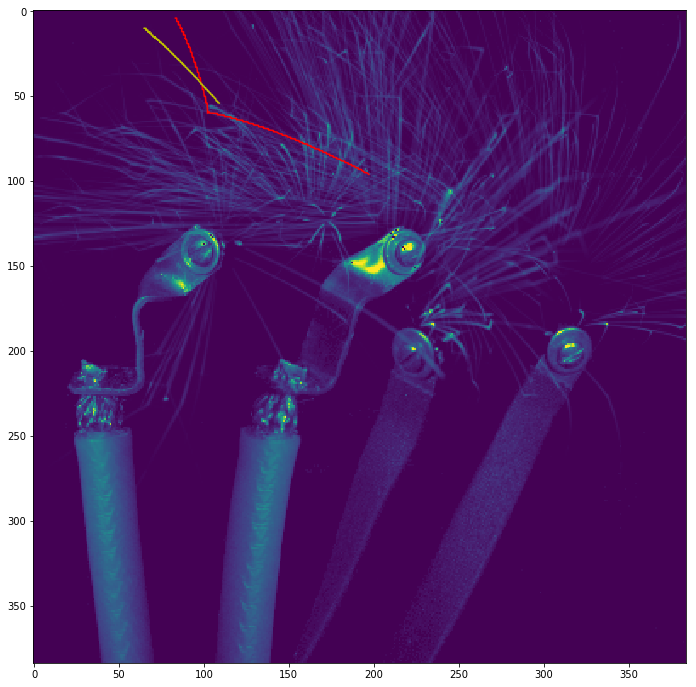

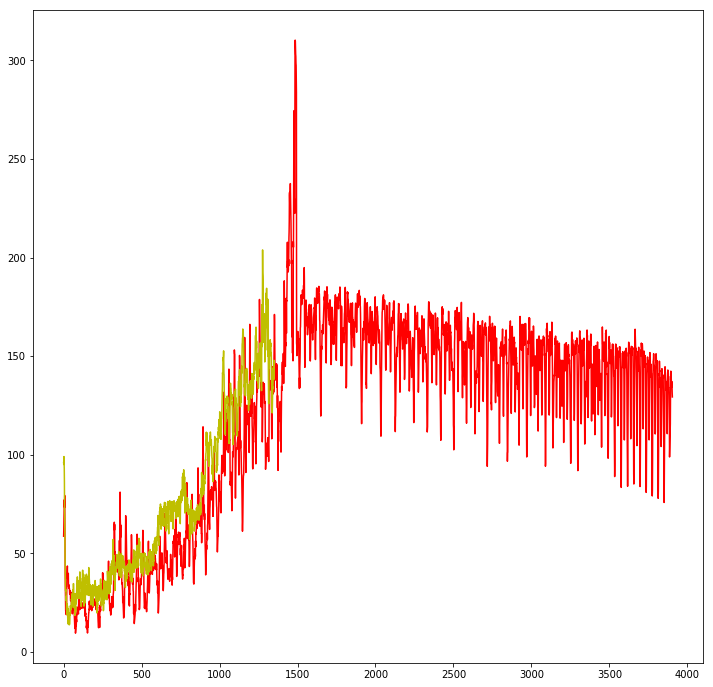

In [60]:
ipL0 = 0
ipR0 = 0
TrackL = tL[tL['particle']==ipL0]
TrackR = tR[tR['particle']==ipR0]
xmax = np.max(TrackR['x'])
xmin = np.min(TrackR['x'])
ymax = np.max(TrackR['y'])
ymin = np.min(TrackR['y'])
plt.figure(figsize = (12,12))  # make a new figure
plt.imshow(v0R+bk0R+v0L+bk0L)
plt.plot(TrackL['x'],TrackL['y'],color='r')
plt.plot(TrackR['x'],TrackR['y'],color='y')
#plt.ylim(ymin-10,ymax+10)
#plt.xlim(xmin-10,xmax+10)
plt.show()
plt.figure(figsize = (12,12))  # make a new figure
plt.plot(TrackL['frame'],TrackL['mass'],color='r')
plt.plot(TrackR['frame'],TrackR['mass'],color='y')
plt.show()


In [44]:
if (len(TrackL)>len(TrackR)):
    a=len(TrackR)
    whichframe = "R"
    print("R camera has less points")
else:
    a=len(TrackL)
    whichframe = "L"
    print("L camera has less points")
MassList = []
massdiffsum = 0
masslistcount = 0
for ia in range(a):
    if(whichframe == "L"):
        iframeL = TrackL['frame'].iloc[ia]
        imassL = TrackL['mass'].iloc[ia]
        tR1 = TrackR[TrackR['frame']==iframeL]
        if(len(tR1)>0):
            imassR = tR1['mass'].iloc[0]
            masslist = [iframeL,imassL,imassR]
            massdiffsum = massdiffsum + (imassL-imassR)*(imassL-imassR)
            masslistcount = masslistcount +1
            MassList.append(masslist)
        else:
            print("No corresponding right frame")
    else:
        iframeR = TrackR['frame'].iloc[ia]
        imassR = TrackR['mass'].iloc[ia] 
        tL1 = TrackL[TrackL['frame']==iframeR]
        if(len(tL1)>0):
            imassL = tL1['mass'].iloc[0]   
            masslist = [iframeL,imassL,imassR]
            massdiffsum = massdiffsum + (imassL-imassR)*(imassL-imassR)
            masslistcount = masslistcount +1
            MassList.append(masslist)
        else:
            print("No corresponding left frame")
print(masslistcount, massdiffsum, math.sqrt(massdiffsum/masslistcount))

R camera has less points
(1479, 1215150.2538192128, 28.663611176760398)


In [ ]:
'''
particle_list = []
for ip in range(len(TrackL)):
#for ip in range(2000,2001):
    ixL = TrackL['x'].iloc[ip]
    iyL = TrackL['y'].iloc[ip]
    iframeL = TrackL['frame'].iloc[ip]
    ipL = [ixL,iyL,1]
    LineR = np.dot(ipL,MatrixR) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    Min = 10000
    MinPID = 0
    MinIndex = 0
    TrackR = tR[tR['frame']==iframeL]  
    plt.figure(figsize=(12,12))
    plt.imshow(v0L+bk0L+v0R+bk0R)
    plt.plot(TrackL['x'],TrackL['y'],color='r')
    plt.plot(ixL,iyL,'o',color='r') 
    plt.plot(Linex,LineyR,color='y')
    for ip2 in range(len(TrackR)):
        ixR = TrackR['x'].iloc[ip2]
        iyR = TrackR['y'].iloc[ip2]
        iparticleR = TrackR['particle'].iloc[ip2]
        ipR = [ixR,iyR,1]
        LineL = np.dot(ipR,MatrixL) 
        LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
        dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl
        #print(ipL,ipR,dlr,drl,iparticleR)
        #TrackRR = tR[tR['particle']==iparticleR]
        if(FF<5):
            ii = [iparticleR, iframeL, dlr, drl]
            particle_list.append(ii)
            #TrackRR = tR[tR['particle']==iparticleR]
            print(ipL,ipR,dlr,drl,iparticleR,iframeL)
            #plt.plot(Linex,LineyL,color='r')
            #plt.plot(TrackRR['x'],TrackRR['y'],color='y')
            #plt.plot(ixR,iyR,'o',color='y') 
    #plt.savefig("./test_{}.tif".format(ip))
'''
'''
        #if(FF<Min):
        #    Min = FF
        #    MinPID = iparticleR
        #    MinIndex = ip2
    ii = [int(MinPID),Min]
    print(iframeL,ixL,iyL,int(MinPID))
    particle_list.append(ii)
    TrackR = tR[tR['particle']== MinPID]
    ixR = TrackR['x'].iloc[MinIndex]
    iyR = TrackR['y'].iloc[MinIndex]
    ipR = [ixR,iyR,1]
    LineR = np.dot(ipL,MatrixR) 
    LineL = np.dot(ipR,MatrixL) 
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    plt.figure(figsize=(12,12))
    plt.imshow(v0L+bk0L+v0R+bk0R)
    plt.plot(TrackL['x'],TrackL['y'],color='r')
    plt.plot(ixL,iyL,'o',color='r') 
    plt.plot(Linex,LineyL,color='r')
    plt.plot(TrackR['x'],TrackR['y'],color='y')
    plt.plot(ixR,iyR,'o',color='y') 
    plt.plot(Linex,LineyR,color='y')
    plt.savefig("./trackL_trackR_{}_{}.tif".format(ipL0,int(MinPID)))
'''

In [ ]:
'''
plist = np.array(particle_list)
plist1 = pd.DataFrame(plist)
plist1.columns = ['PID','Frame','Distance1','Distance2']
plist2 = plist1[plist1['Distance1']<5]
plt.figure(figsize = (12,12))
plt.subplot(211)
plt.scatter(plist2['Frame'],plist2['PID'],color='b')
plt.subplot(212)
plt.scatter(plist2['PID'],plist2['Distance1'],color='b')
#plt.hist(plist2['PID'])
#plt.savefig("./PID_Frame_{}.tif".format(ipL0))
plt.show()
'''

In [ ]:
'''
a = plist2['PID'].unique()
a = a.astype(int)
a
#np.bincount(a).argmax()
'''

In [ ]:
'''
for ii in plist1['PID'].unique():
    ipR0 = ii
    print(ii)
    TrackR = tR[tR['particle']==ipR0]
    xmax = np.max(TrackR['x'])
    xmin = np.min(TrackR['x'])
    ymax = np.max(TrackR['y'])
    ymin = np.min(TrackR['y'])
    plt.figure(figsize = (12,12))  # make a new figure
    plt.subplot(211)
    plt.imshow(v0R+bk0R+v0L+bk0L)
    plt.plot(TrackL['x'],TrackL['y'],color='r')
    plt.plot(TrackR['x'],TrackR['y'],color='y')
#plt.ylim(ymin-10,ymax+10)
#plt.xlim(xmin-10,xmax+10)
    #plt.show()
    #plt.figure(figsize = (12,12))  # make a new figure
    plt.subplot(212)
    plt.plot(TrackL['frame'],TrackL['mass'],color='r')
    plt.plot(TrackR['frame'],TrackR['mass'],color='y')
    #plt.show()
    plt.savefig("./Compare_{}_{}.tif".format(ipL0,ipR0))
#nplist = np.array(plist1['PID'])
#np.bincount(nplist).argmax()
#nplist = nplist.astype(int)
#np.bincount(nplist).argmax()
'''

In [ ]:
'''
ipR0 = 1
TrackR = tR[tR['particle']==ipR0]
xmax = np.max(TrackR['x'])
xmin = np.min(TrackR['x'])
ymax = np.max(TrackR['y'])
ymin = np.min(TrackR['y'])
plt.figure(figsize = (12,12))  # make a new figure
plt.imshow(v0R+bk0R+v0L+bk0L)
plt.plot(TrackL['x'],TrackL['y'],color='r')
plt.plot(TrackR['x'],TrackR['y'],color='y')
#plt.ylim(ymin-10,ymax+10)
#plt.xlim(xmin-10,xmax+10)
plt.show()
plt.figure(figsize = (12,12))  # make a new figure
plt.plot(TrackL['frame'],TrackL['mass'],color='r')
plt.plot(TrackR['frame'],TrackR['mass'],color='y')
plt.show()
'''

In [ ]:
'''
for ilist in plist1['PID'].unique():
    TrackR = tR[tR['particle']==ilist]
    xmax = np.max(TrackR['x'])
    xmin = np.min(TrackR['x'])
    ymax = np.max(TrackR['y'])
    ymin = np.min(TrackR['y'])
    print("particle ID:",ilist)
    plt.figure(figsize = (12,12))  # make a new figure
    plt.subplot(211)
    plt.imshow(v0L+bk0L+v0R+bk0R)
    plt.plot(TrackL['x'],TrackL['y'],color=TrackL['mass'])
    plt.plot(TrackR['x'],TrackR['y'],color=TrackR['mass'])
    #plt.ylim(ymin-10,ymax+10)
    #plt.xlim(xmin-10,xmax+10)
    #plt.show()
    plt.subplot(212)
    #plt.figure(figsize = (12,12))  # make a new figure
    plt.plot(TrackL['frame'],TrackL['mass'],color='r')
    plt.plot(TrackR['frame'],TrackR['mass'],color='b')
    #plt.savefig("./trackL_framebk_{}_{}.tif".format(ipL0,int(ilist)))
    plt.show()
'''

In [ ]:
'''
plt.figure(figsize=(12,12))
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
#for ii in range(230,len(fL)):
for ii in range(0,10):
    xL = fL['x'].iloc[ii]
    yL = fL['y'].iloc[ii]
    xR = fR['x'].iloc[ii]
    yR = fR['y'].iloc[ii]   
    ipL_i = [xL,yL,1]
    ipR_i = [xR,yR,1]
    LineR = np.dot(ipL_i,MatrixR) 
    LineL = np.dot(ipR_i,MatrixL) 
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyL,color='g')
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyR,color='r')
    dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
    #FF = dlr + drl
    #print(ii,xL,yL,xR,yR,dlr,drl)
plt.show()
'''